In [107]:
import os
import pandas as pd

# Path to the directory containing the CSV files
directory_path = r'C:\Users\param\OneDrive - Neo\OneDrive\Documents\PyCharmProjects\UCSD-CSE\CSE 256\Final-Project\kaggle'

# Dictionary to store DataFrames
df = {}

# Iterate through the directory and load each CSV file
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(directory_path, filename)  # Full path to the file
        key = os.path.splitext(filename)[0]  # Remove file extension for the key
        df[key] = pd.read_csv(file_path)  # Load CSV into a DataFrame and store in dict

# Optional: Print the keys of the dictionary
print("Loaded DataFrames:", df.keys())

Loaded DataFrames: dict_keys(['llm_results_all_methods', 'llm_results_Code_Execution_with_SymPy', 'llm_results_RAG', 'llm_results_RAG_+_CoT', 'llm_results_RAG_+_Self-Consistency_Decoding', 'llm_results_Self-Consistency_Decoding', 'llm_results_Self-Consistency_Decoding_5', 'llm_results_Self-Consistency_Decoding_deepseek_math', 'llm_results_Standard_CoT_Prompting', 'performance_comparison'])


In [108]:
df['llm_results_all_methods']

,problem,llm_answer,all_extracted_answers,correct_answer,result,llm_solution,method
0,How many square units are in the region satisf...,2.25,['2.25'],4.5,Wrong,['Solve the following problem and provide the ...,Zero-Shot Prompting
1,"When Lauren was born on January 1, 1990, her g...",1156,['1156'],1160,Wrong,['Solve the following problem and provide the ...,Zero-Shot Prompting
2,Chris labels every lattice point in the coordi...,12,['12'],12,Correct,['Solve the following problem and provide the ...,Zero-Shot Prompting
3,An airplane climbs 100 feet during the first s...,15,['15'],15,Correct,['Solve the following problem and provide the ...,Zero-Shot Prompting
4,Define $f(x)=\frac{1+x}{1-x}$ and $g(x)=\frac{...,2,['2'],4,Wrong,['Solve the following problem and provide the ...,Zero-Shot Prompting
...,...,...,...,...,...,...,...
295,Dr. Jones lives in a country with a progressiv...,146666.67,['146666.67'],"\$115,000",Wrong,['Below is a math problem you need to solve. U...,Code Execution with SymPy
296,Given that $x$ is an integer such that $x\sqrt...,2,['2'],49,Wrong,['Below is a math problem you need to solve. U...,Code Execution with SymPy
297,Billy shoots an arrow from 10 feet above the g...,\frac{1}{5},['\\frac{1}{5}'],\dfrac{1}{5},Wrong,['Below is a math problem you need to solve. U...,Code Execution with SymPy
298,"Suppose $f(x)$ is an invertible function, and ...",2,['2'],2,Correct,['Below is a math problem you need to solve. U...,Code Execution with SymPy


In [109]:
df['llm_results_all_methods'].method = df['llm_results_all_methods'].method.replace('RAG + Self-Consistency Decoding', 'RAG + Self-Consistency Decoding (3 Samples)')

In [110]:
df['llm_results_all_methods'].method.value_counts()

method
Zero-Shot Prompting                            50
Standard CoT Prompting                         50
RAG                                            50
RAG + CoT                                      50
RAG + Self-Consistency Decoding (3 Samples)    50
Code Execution with SymPy                      50
Name: count, dtype: int64

In [111]:
df['llm_results_Self-Consistency_Decoding']['method'] = 'Self-Consistency Decoding (3 Samples)'
df['llm_results_all_methods'] = pd.concat([df['llm_results_all_methods'], df['llm_results_Self-Consistency_Decoding']])

In [112]:
df['llm_results_all_methods'].method.value_counts()

method
Zero-Shot Prompting                            50
Standard CoT Prompting                         50
RAG                                            50
RAG + CoT                                      50
RAG + Self-Consistency Decoding (3 Samples)    50
Code Execution with SymPy                      50
Self-Consistency Decoding (3 Samples)          50
Name: count, dtype: int64

In [113]:
df['llm_results_Self-Consistency_Decoding_5']['method'] = 'Self-Consistency Decoding (5 Samples)'
df['llm_results_all_methods'] = pd.concat([df['llm_results_all_methods'], df['llm_results_Self-Consistency_Decoding_5']])

In [114]:
df['llm_results_all_methods'].method.value_counts()

method
Zero-Shot Prompting                            50
Standard CoT Prompting                         50
RAG                                            50
RAG + CoT                                      50
RAG + Self-Consistency Decoding (3 Samples)    50
Code Execution with SymPy                      50
Self-Consistency Decoding (3 Samples)          50
Self-Consistency Decoding (5 Samples)          50
Name: count, dtype: int64

In [115]:
df['llm_results_all_methods'].method = '[DeepSeek-Prover-V1.5-RL] ' + df['llm_results_all_methods'].method

In [116]:
df['llm_results_Self-Consistency_Decoding_deepseek_math']['method'] = '[DeepSeek-Math-7b-RL] Self-Consistency Decoding (3 Samples)'
df['llm_results_all_methods'] = pd.concat([df['llm_results_all_methods'], df['llm_results_Self-Consistency_Decoding_deepseek_math']])

In [117]:
df['llm_results_all_methods'].method.value_counts()

method
[DeepSeek-Prover-V1.5-RL] Zero-Shot Prompting                            50
[DeepSeek-Prover-V1.5-RL] Standard CoT Prompting                         50
[DeepSeek-Prover-V1.5-RL] RAG                                            50
[DeepSeek-Prover-V1.5-RL] RAG + CoT                                      50
[DeepSeek-Prover-V1.5-RL] RAG + Self-Consistency Decoding (3 Samples)    50
[DeepSeek-Prover-V1.5-RL] Code Execution with SymPy                      50
[DeepSeek-Prover-V1.5-RL] Self-Consistency Decoding (3 Samples)          50
[DeepSeek-Prover-V1.5-RL] Self-Consistency Decoding (5 Samples)          50
[DeepSeek-Math-7b-RL] Self-Consistency Decoding (3 Samples)              50
Name: count, dtype: int64

In [118]:
df['llm_results_all_methods']

,problem,llm_answer,all_extracted_answers,correct_answer,result,llm_solution,method
0,How many square units are in the region satisf...,2.25,['2.25'],4.5,Wrong,['Solve the following problem and provide the ...,[DeepSeek-Prover-V1.5-RL] Zero-Shot Prompting
1,"When Lauren was born on January 1, 1990, her g...",1156,['1156'],1160,Wrong,['Solve the following problem and provide the ...,[DeepSeek-Prover-V1.5-RL] Zero-Shot Prompting
2,Chris labels every lattice point in the coordi...,12,['12'],12,Correct,['Solve the following problem and provide the ...,[DeepSeek-Prover-V1.5-RL] Zero-Shot Prompting
3,An airplane climbs 100 feet during the first s...,15,['15'],15,Correct,['Solve the following problem and provide the ...,[DeepSeek-Prover-V1.5-RL] Zero-Shot Prompting
4,Define $f(x)=\frac{1+x}{1-x}$ and $g(x)=\frac{...,2,['2'],4,Wrong,['Solve the following problem and provide the ...,[DeepSeek-Prover-V1.5-RL] Zero-Shot Prompting
...,...,...,...,...,...,...,...
45,Dr. Jones lives in a country with a progressiv...,141250,"['141250', '120000', '138750']","\$115,000",Wrong,['Below is a math problem you need to solve. T...,[DeepSeek-Math-7b-RL] Self-Consistency Decodin...
46,Given that $x$ is an integer such that $x\sqrt...,7,"['49', '7', '7']",49,Wrong,['Below is a math problem you need to solve. T...,[DeepSeek-Math-7b-RL] Self-Consistency Decodin...
47,Billy shoots an arrow from 10 feet above the g...,2,"['\\frac{1}{2}', '2', '2']",\dfrac{1}{5},Wrong,['Below is a math problem you need to solve. T...,[DeepSeek-Math-7b-RL] Self-Consistency Decodin...
48,"Suppose $f(x)$ is an invertible function, and ...",2,"['2', '2', '2']",2,Correct,['Below is a math problem you need to solve. P...,[DeepSeek-Math-7b-RL] Self-Consistency Decodin...


In [119]:
df['llm_results_all_methods'].to_csv(f'llm_results_comprehensive.csv', index=False)

In [121]:
# Filter rows where 'result' column equals 'Wrong'
wrong_rows = df['llm_results_Standard_CoT_Prompting'][df['llm_results_Standard_CoT_Prompting']['result'] == 'Wrong']

# Iterate over each row and print in the specified format
for _, row in wrong_rows.iterrows():
    for col, value in row.items():
        print(f"**{col}**: {value}")
    print("\n" + "-" * 30 + "\n")  # Separator between rows


**problem**: How many square units are in the region satisfying the inequalities $y \ge |x|$ and $y \le -|x|+3$? Express your answer as a decimal.
**llm_answer**: \frac{9}{4}
**all_extracted_answers**: ['\\frac{9}{4}']
**correct_answer**: 4.5
**result**: Wrong
**llm_solution**: ['Solve the following problem step by step, explaining your reasoning clearly. Provide the final answer within \\boxed{}.\n\n"How many square units are in the region satisfying the inequalities $y \\ge |x|$ and $y \\le -|x|+3$? Express your answer as a decimal."\n\nTo solve the problem, we need to determine the area of the region defined by the inequalities \\( y \\ge |x| \\) and \\( y \\le -|x| + 3 \\).\n\nFirst, let\'s analyze the inequalities:\n\n1. \\( y \\ge |x| \\):\n   - This inequality represents all points above the graph of \\( y = |x| \\).\n   - The graph of \\( y = |x| \\) is a V-shaped graph that opens upwards, with the vertex at the origin (0,0).\n\n2. \\( y \\le -|x| + 3 \\):\n   - This inequality

DataFrame Schema and Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   problem                450 non-null    object
 1   llm_answer             449 non-null    object
 2   all_extracted_answers  450 non-null    object
 3   correct_answer         450 non-null    object
 4   result                 450 non-null    object
 5   llm_solution           450 non-null    object
 6   method                 450 non-null    object
dtypes: object(7)
memory usage: 24.7+ KB
None

Description of Each Field:

Schema Description:
- problem (non-null, object):
  Contains the mathematical problems presented to the language model for solving.
  
- llm_answer (399 non-null, object):
  The predicted or computed answer by the language model for the respective problem. There is one missing value.
  
- all_extracted_answers (non-null, objec

C:\Users\param\AppData\Local\Temp\ipykernel_20416\352077414.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='method', y='accuracy (%)', data=grouped_stats, palette='viridis')


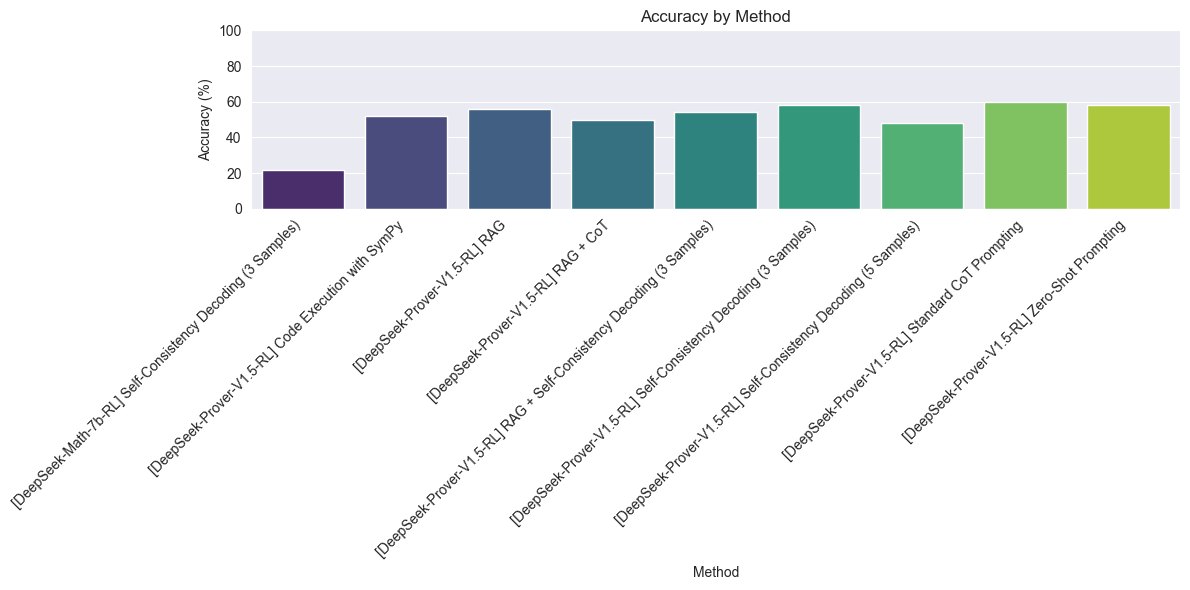

C:\Users\param\AppData\Local\Temp\ipykernel_20416\352077414.py:215: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='method', y='average_correct_extracted', data=extracted_stats, palette='magma')


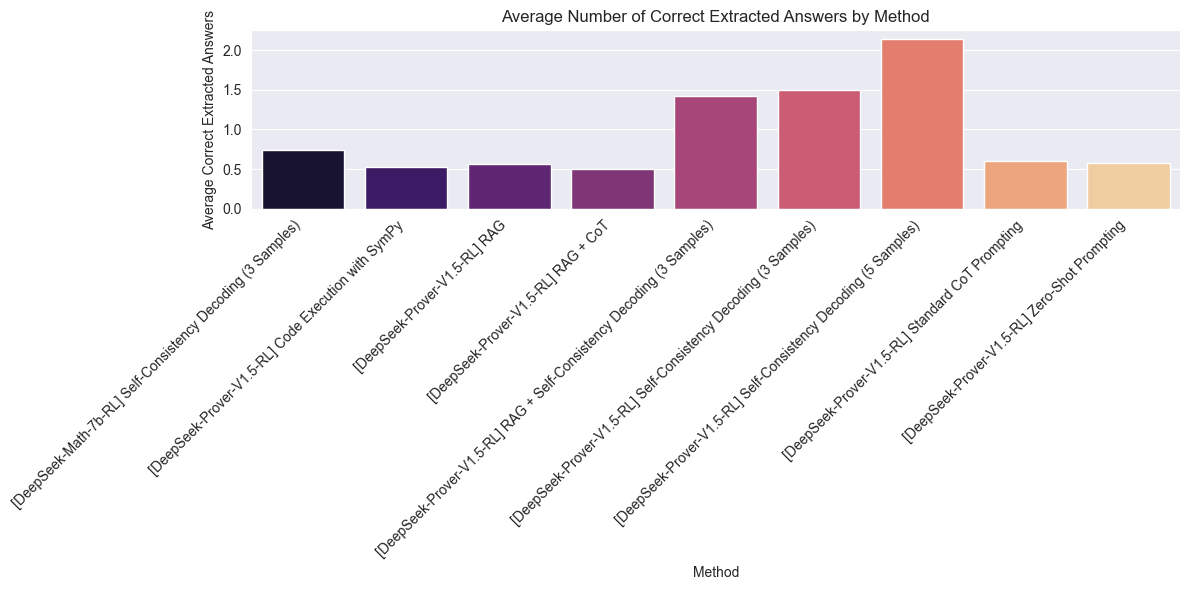

C:\Users\param\AppData\Local\Temp\ipykernel_20416\352077414.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='method', y='average_consistency', data=consistency_stats, palette='coolwarm')


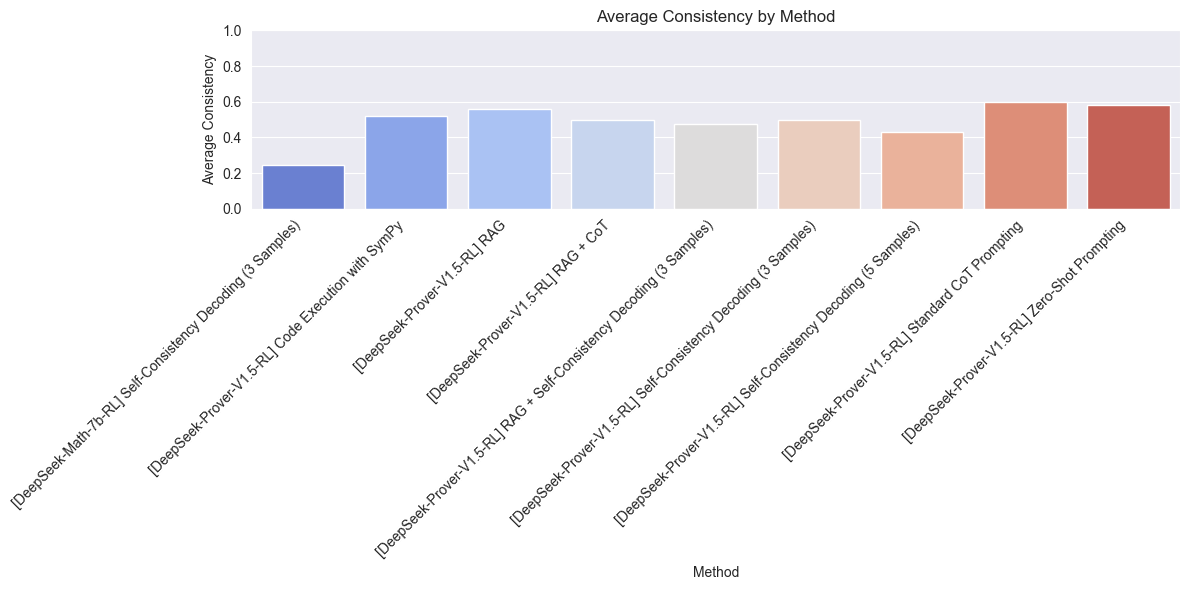

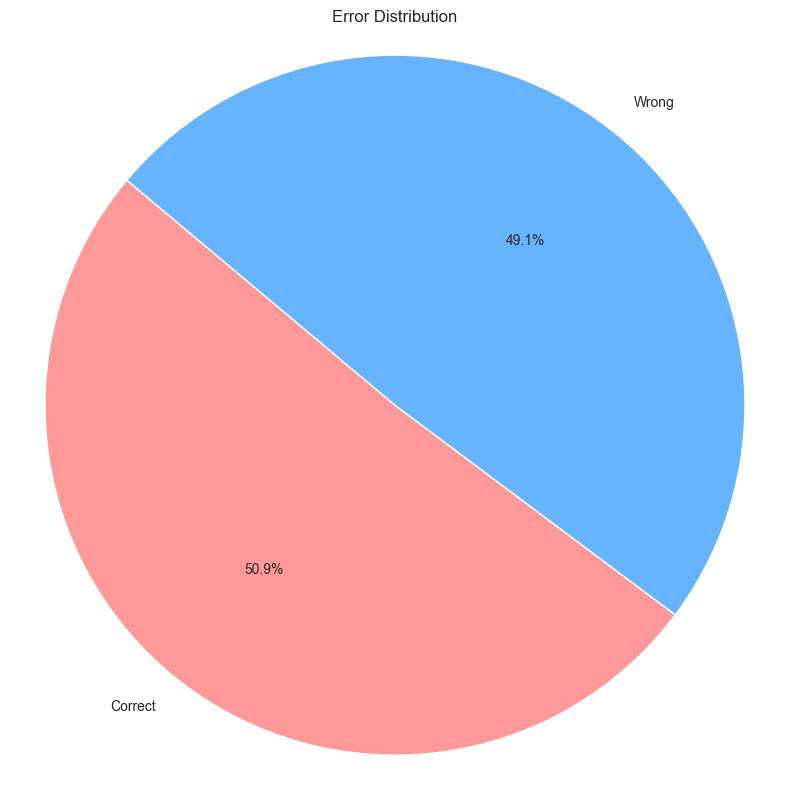

C:\Users\param\AppData\Local\Temp\ipykernel_20416\352077414.py:249: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method', y='correct_extracted_count', data=data, palette='Set2')


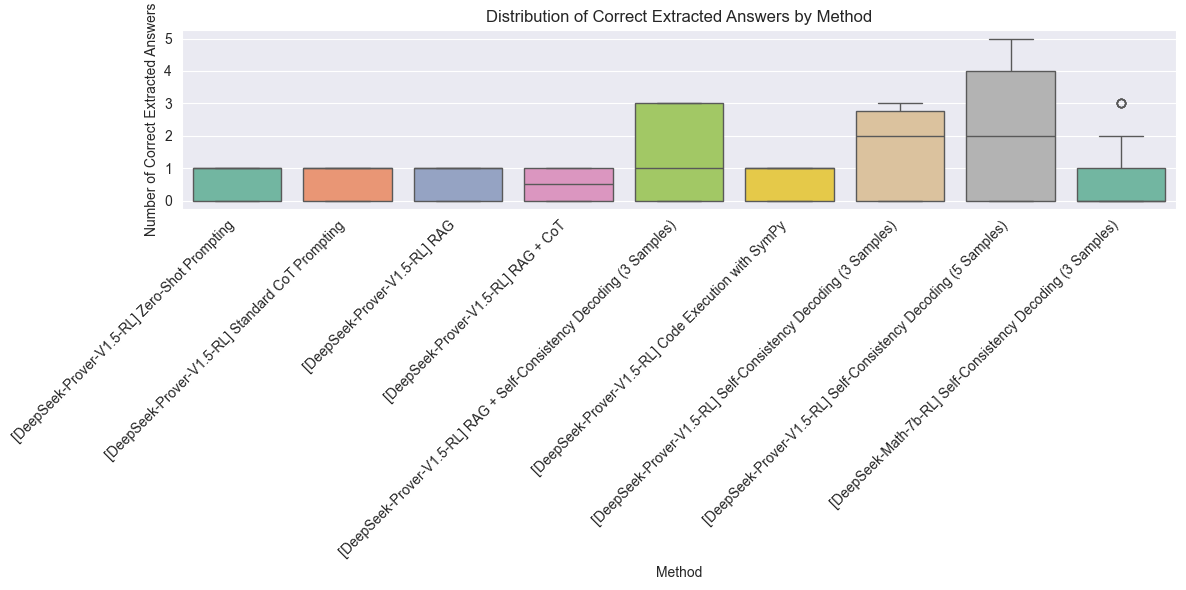

C:\Users\param\AppData\Local\Temp\ipykernel_20416\352077414.py:260: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method', y='consistency', data=data, palette='Set3')


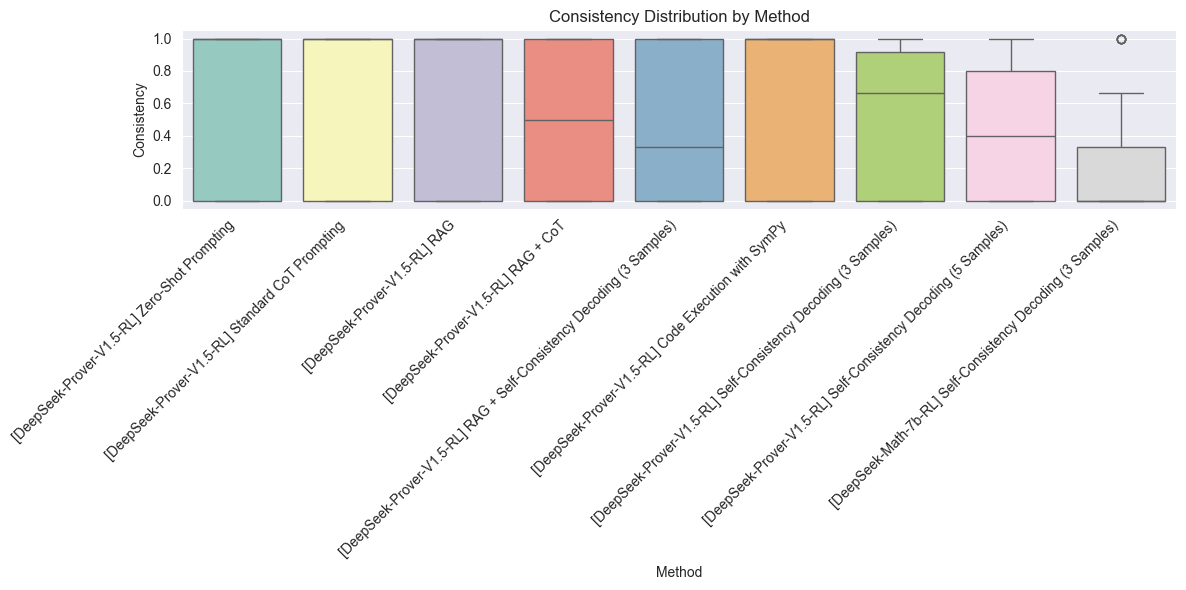

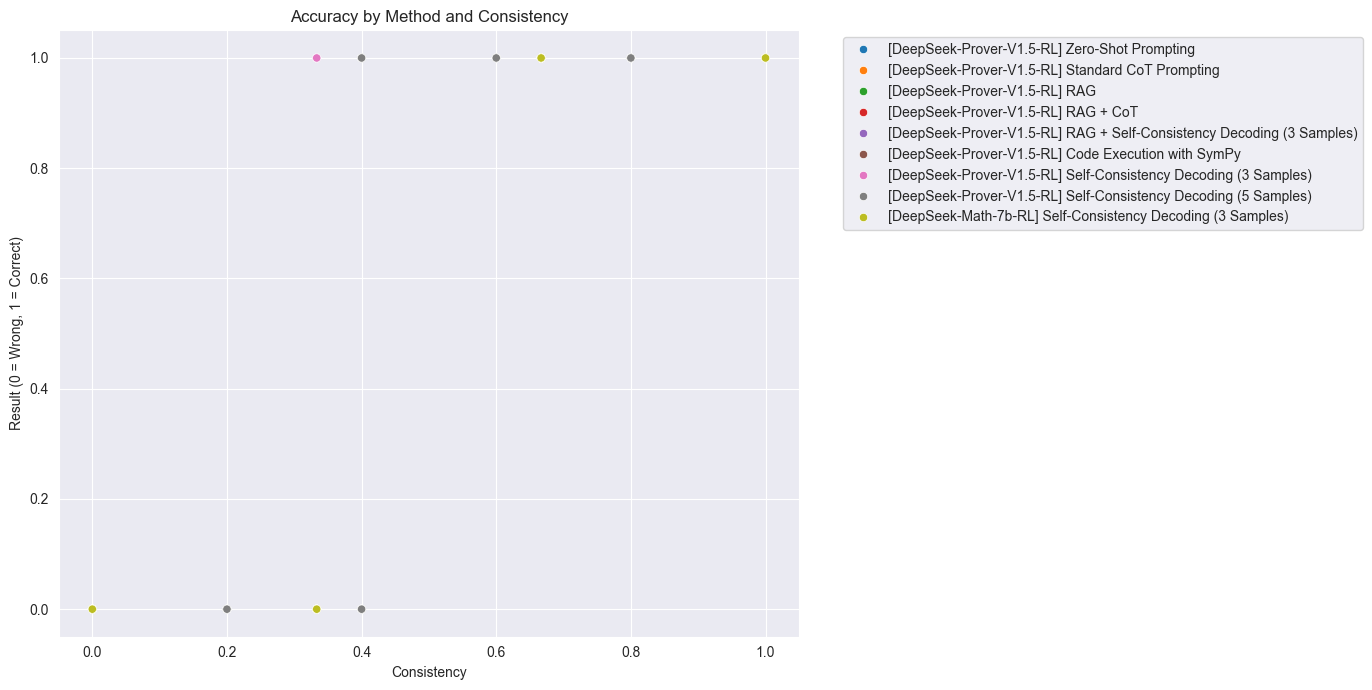

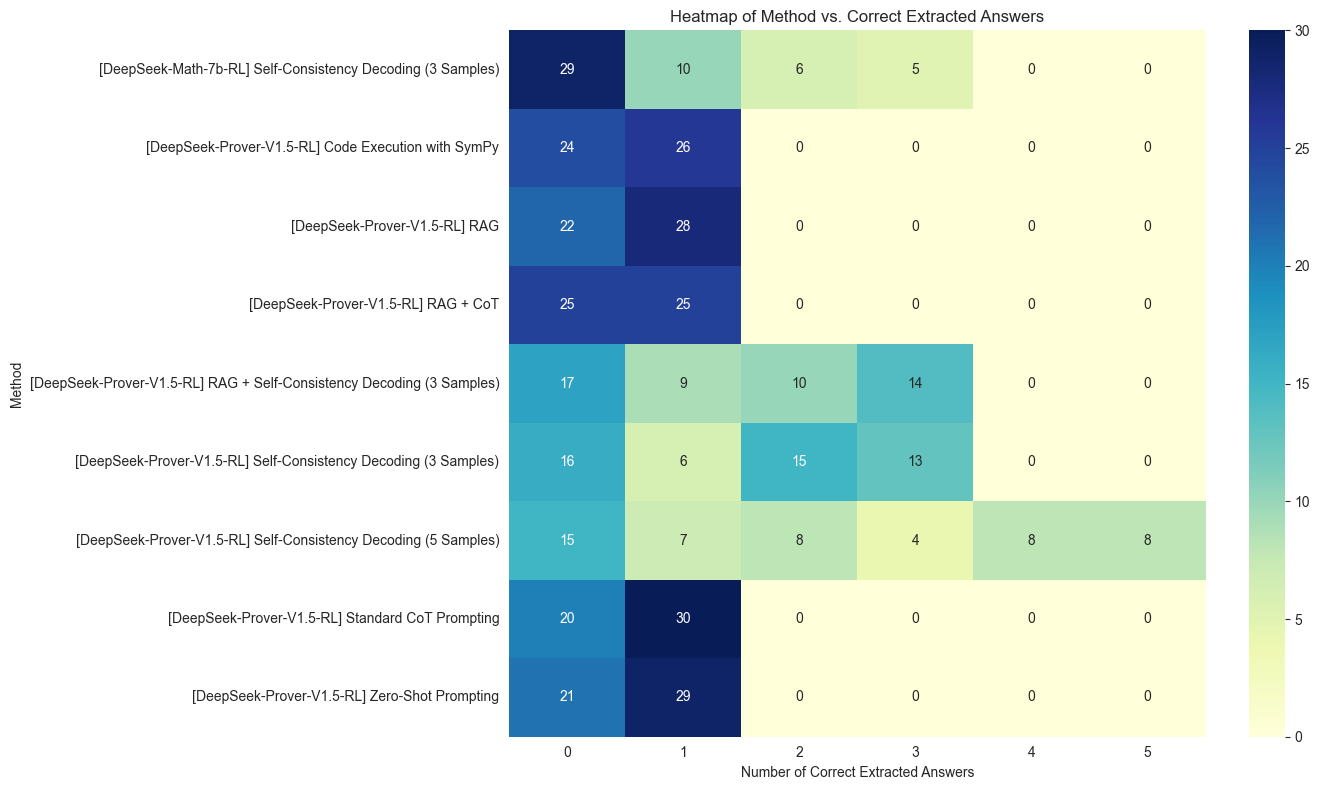


Overall Accuracy: 50.89%
Best Performing Method: [DeepSeek-Prover-V1.5-RL] Standard CoT Prompting with 60.00% Accuracy
Highest Consistency Method: [DeepSeek-Prover-V1.5-RL] Standard CoT Prompting with 0.60 Consistency

All analyses and visualizations have been successfully generated and saved.


In [102]:
# Comprehensive Analysis and Visualization of LLM Results

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.ticker as mtick

# Define the is_correct function
def parse_expression(expr):
    """
    Parses a LaTeX or string expression into a SymPy expression.
    Handles roots, exponents, and special functions.
    """
    from sympy import sympify
    if expr is None:
        return None
    
    expr = expr.strip('$').strip()
    
    # Replace LaTeX root notation with SymPy notation
    expr = expr.replace(r'\sqrt', 'sqrt')
    expr = expr.replace(r'\left', '')
    expr = expr.replace(r'\right', '')
    
    # Replace LaTeX fractions
    expr = expr.replace(r'\frac', '')
    
    # Handle specific LaTeX symbols
    replacements = {
        r'\mathbb{R}': 'Reals'
    }
    for latex_sym, sympy_sym in replacements.items():
        expr = expr.replace(latex_sym, sympy_sym)
    
    # Remove LaTeX-specific characters
    expr = expr.replace('{', '(')
    expr = expr.replace('}', ')')
    expr = expr.replace('\\', '')
    
    try:
        # Parse the expression using SymPy
        sympy_expr = sympify(expr)
        return sympy_expr
    except Exception as e:
        return None

def is_correct(predicted, true):
    """
    Compares the predicted answer with the true answer symbolically or numerically.
    """
    if predicted is None or true is None:
        return False

    # Try to parse and evaluate both predicted and true answers
    try:
        # Parse the predicted answer
        pred_expr = parse_expression(predicted)
        if pred_expr is not None:
            pred_value = float(pred_expr.evalf())
        else:
            pred_value = float(predicted)

        # Parse the true answer
        true_expr = parse_expression(true)
        if true_expr is not None:
            true_value = float(true_expr.evalf())
        else:
            true_value = float(true)

        # Compare the numerical values
        return abs(pred_value - true_value) < 1e-6
    except Exception as e:
        pass

    # If parsing fails, fallback to string comparison
    predicted_clean = ''.join(predicted.split())
    true_clean = ''.join(true.split())
    return predicted_clean == true_clean

# 1. Load the CSV File
file_path = 'llm_results_comprehensive.csv'
data = pd.read_csv(file_path)

# 2. Display Schema and Description
print("DataFrame Schema and Information:")
print(data.info())
print("\nDescription of Each Field:")
print("""
Schema Description:
- problem (non-null, object):
  Contains the mathematical problems presented to the language model for solving.
  
- llm_answer (399 non-null, object):
  The predicted or computed answer by the language model for the respective problem. There is one missing value.
  
- all_extracted_answers (non-null, object):
  A list or set of all answers generated during different steps or iterations of the solving process for the respective problem.
  
- correct_answer (non-null, object):
  The ground truth or correct answer for each mathematical problem.
  
- result (non-null, object):
  Indicates whether the model's final answer was correct or wrong ("Correct" or "Wrong").
  
- llm_solution (non-null, object):
  Detailed step-by-step solutions generated by the language model, often in the form of reasoning or code.
  
- method (non-null, object):
  The method or technique used to generate the solution, such as "Zero-Shot Prompting," "RAG + CoT," etc.
""")

# 3. Preliminary Data Exploration
print("\nFirst Five Rows of the DataFrame:")
print(data.head())

print("\nStatistical Summary:")
print(data.describe(include='all'))

# 4. Data Cleaning and Preprocessing

# Handle missing values in 'llm_answer' by filling with NaN
data['llm_answer'] = data['llm_answer'].fillna(np.nan)

# Convert 'all_extracted_answers' from string representation of lists to actual lists
def convert_to_list(answer_str):
    try:
        return ast.literal_eval(answer_str)
    except:
        return []

data['all_extracted_answers'] = data['all_extracted_answers'].apply(convert_to_list)

# 5. Grouped Statistics by 'method' Field
grouped_stats = data.groupby('method').agg(
    answered=('llm_answer', 'count'),
    correct=('result', lambda x: (x == 'Correct').sum()),
    total_problems=('problem', 'count')
).reset_index()

grouped_stats['accuracy (%)'] = (grouped_stats['correct'] / grouped_stats['total_problems']) * 100

print("\nMethod-Wise Performance Statistics:")
print(grouped_stats)

# 6. Detailed Analysis of 'all_extracted_answers'

# Function to count correct answers in the extracted answers
def count_correct_extracted_answers(row):
    correct = row['correct_answer']
    extracted = row['all_extracted_answers']
    correct_count = 0
    for ans in extracted:
        if is_correct(ans, correct):
            correct_count += 1
    return correct_count

data['correct_extracted_count'] = data.apply(count_correct_extracted_answers, axis=1)

# Calculate statistics
extracted_stats = data.groupby('method').agg(
    total_correct_extracted=('correct_extracted_count', 'sum'),
    average_correct_extracted=('correct_extracted_count', 'mean'),
    max_correct_extracted=('correct_extracted_count', 'max'),
    min_correct_extracted=('correct_extracted_count', 'min')
).reset_index()

print("\nMethod-Wise Extracted Answers Correctness Statistics:")
print(extracted_stats)

# 7. Consistency Analysis

# Calculate consistency as the proportion of extracted answers that are correct
def calculate_consistency(row):
    extracted = row['all_extracted_answers']
    correct = row['correct_answer']
    if not extracted:
        return 0
    correct_count = sum([is_correct(ans, correct) for ans in extracted])
    return correct_count / len(extracted)

data['consistency'] = data.apply(calculate_consistency, axis=1)

consistency_stats = data.groupby('method').agg(
    average_consistency=('consistency', 'mean'),
    median_consistency=('consistency', 'median'),
    std_consistency=('consistency', 'std')
).reset_index()

print("\nMethod-Wise Consistency Statistics:")
print(consistency_stats)

# Encode 'result' to numerical values for analysis
data['result_binary'] = data['result'].map({'Correct': 1, 'Wrong': 0})

# 8. Visualization

# 8.1. Accuracy by Method
plt.figure(figsize=(12, 6))
sns.barplot(x='method', y='accuracy (%)', data=grouped_stats, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy by Method')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('accuracy_by_method.png', dpi=300)
plt.show()

# 8.2. Correct Extracted Answers by Method
plt.figure(figsize=(12, 6))
sns.barplot(x='method', y='average_correct_extracted', data=extracted_stats, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Average Correct Extracted Answers')
plt.title('Average Number of Correct Extracted Answers by Method')
plt.tight_layout()
plt.savefig('correct_extracted_by_method.png', dpi=300)
plt.show()

# 8.3. Consistency by Method
plt.figure(figsize=(12, 6))
sns.barplot(x='method', y='average_consistency', data=consistency_stats, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Average Consistency')
plt.title('Average Consistency by Method')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('consistency_by_method.png', dpi=300)
plt.show()

# 8.4. Error Distribution Pie Chart
error_counts = data['result'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')
plt.title('Error Distribution')
plt.tight_layout()
plt.savefig('error_distribution_pie.png', dpi=300)
plt.show()

# 8.5. Distribution of Correct Extracted Answers
plt.figure(figsize=(12,6))
sns.boxplot(x='method', y='correct_extracted_count', data=data, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Number of Correct Extracted Answers')
plt.title('Distribution of Correct Extracted Answers by Method')
plt.tight_layout()
plt.savefig('correct_extracted_distribution.png', dpi=300)
plt.show()

# 8.6. Consistency Distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='method', y='consistency', data=data, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Consistency')
plt.title('Consistency Distribution by Method')
plt.tight_layout()
plt.savefig('consistency_distribution.png', dpi=300)
plt.show()

# 9. Advanced Grouped Analysis

# 9.1. Accuracy by Method and Consistency
plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='consistency', y='result_binary', hue='method', palette='tab10')
plt.xlabel('Consistency')
plt.ylabel('Result (0 = Wrong, 1 = Correct)')
plt.title('Accuracy by Method and Consistency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('accuracy_consistency_scatter.png', dpi=300)
plt.show()

# 9.2. Heatmap of Method vs. Correct Extracted Answers
pivot_table = data.pivot_table(index='method', columns='correct_extracted_count', values='problem', aggfunc='count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Number of Correct Extracted Answers')
plt.ylabel('Method')
plt.title('Heatmap of Method vs. Correct Extracted Answers')
plt.tight_layout()
plt.savefig('heatmap_method_correct_extracted.png', dpi=300)
plt.show()

# 10. Summary Statistics

# Overall Accuracy
overall_correct = data['result_binary'].sum()
overall_total = data['result_binary'].count()
overall_accuracy = (overall_correct / overall_total) * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

# Method with Highest Accuracy
best_method = grouped_stats.loc[grouped_stats['accuracy (%)'].idxmax()]['method']
best_accuracy = grouped_stats['accuracy (%)'].max()
print(f"Best Performing Method: {best_method} with {best_accuracy:.2f}% Accuracy")

# Method with Highest Consistency
best_consistency_method = consistency_stats.loc[consistency_stats['average_consistency'].idxmax()]['method']
best_consistency = consistency_stats['average_consistency'].max()
print(f"Highest Consistency Method: {best_consistency_method} with {best_consistency:.2f} Consistency")

# 11. Save All Plots and Statistics

# Save grouped_stats to CSV
grouped_stats.to_csv('method_wise_performance_statistics.csv', index=False)

# Save extracted_stats to CSV
extracted_stats.to_csv('method_wise_extracted_answers_statistics.csv', index=False)

# Save consistency_stats to CSV
consistency_stats.to_csv('method_wise_consistency_statistics.csv', index=False)

print("\nAll analyses and visualizations have been successfully generated and saved.")

In [103]:
# !pip install statsmodels

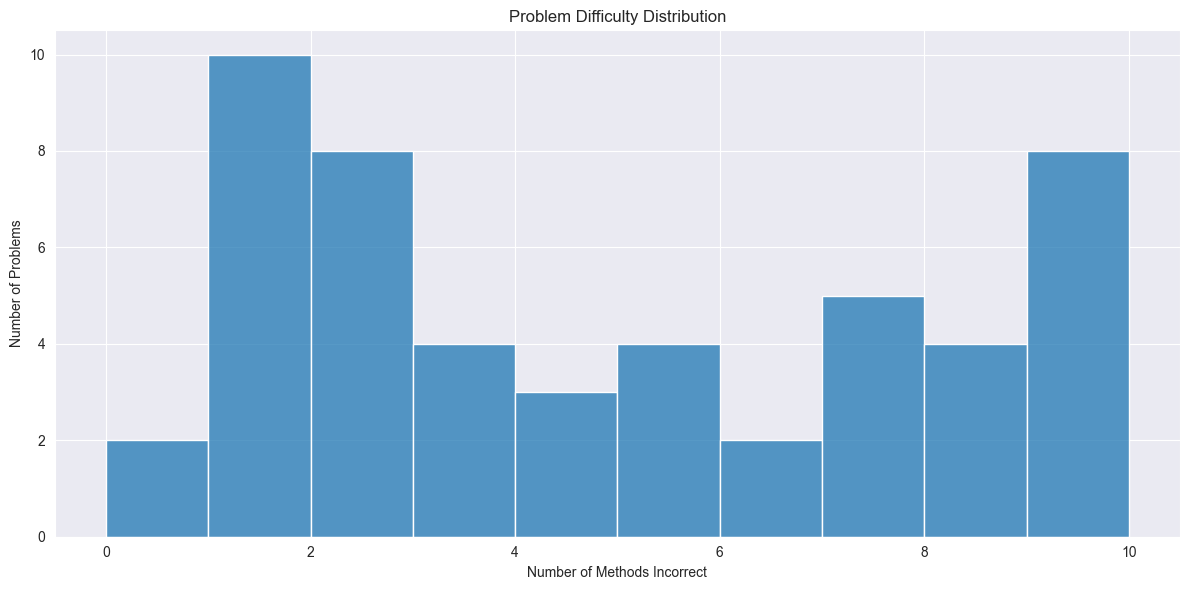

Correlation between Consistency and Accuracy: 0.95


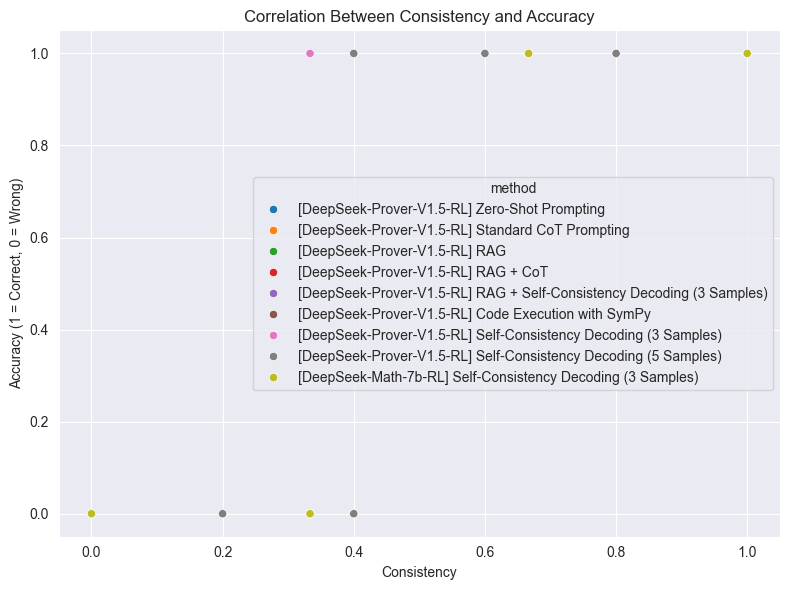

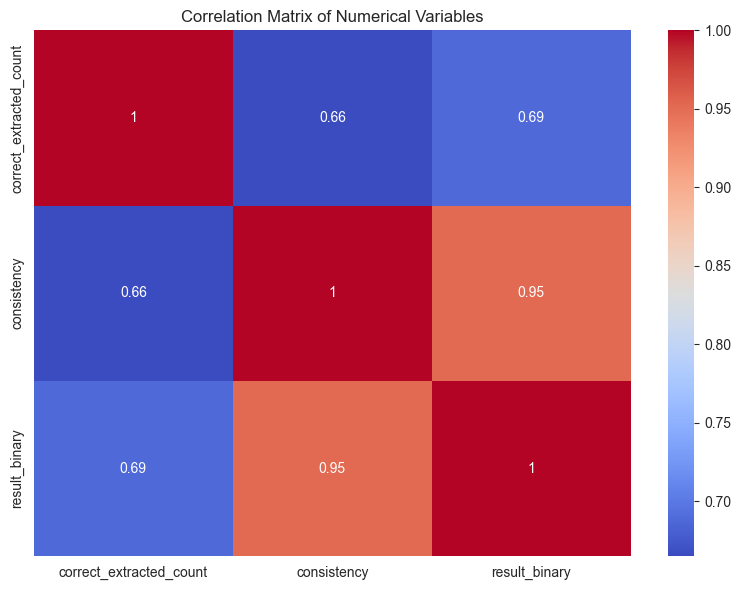

Optimization terminated successfully.
         Current function value: 0.035237
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:          result_binary   No. Observations:                  450
Model:                          Logit   Df Residuals:                      447
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.9492
Time:                        15:53:00   Log-Likelihood:                -15.857
converged:                       True   LL-Null:                       -311.85
Covariance Type:            nonrobust   LLR p-value:                2.843e-129
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.5938      2.704     -3.918      0.000     -15.894      -5.294
consistency     

C:\Users\param\AppData\Local\Temp\ipykernel_20416\2681475918.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='consistency', data=consistency_methods, palette='Set1')


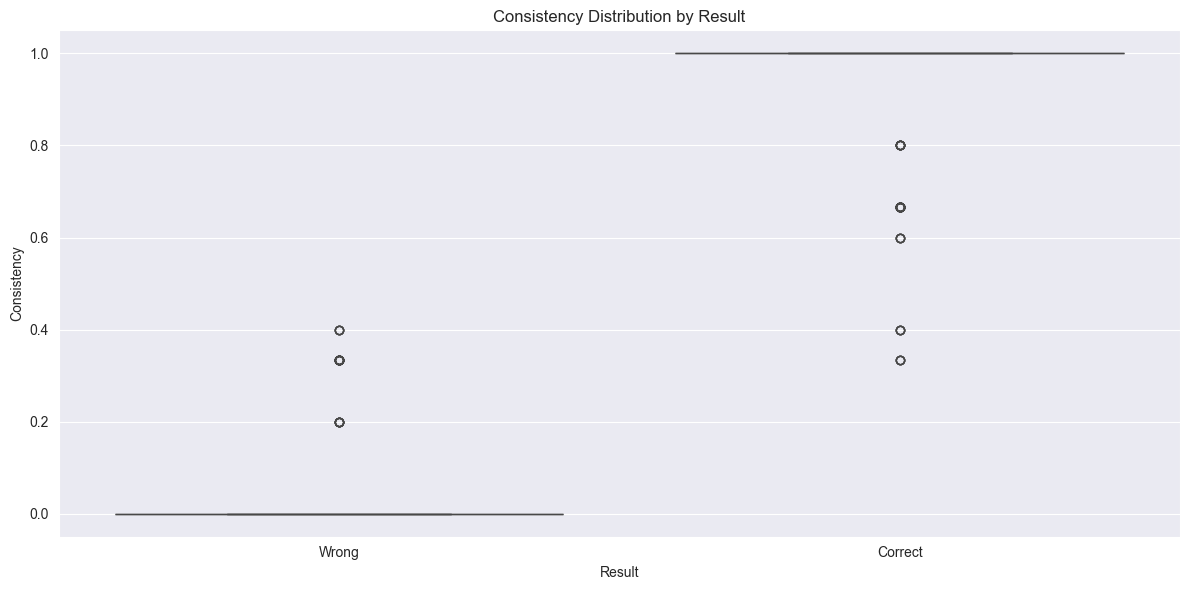

C:\Users\param\AppData\Local\Temp\ipykernel_20416\2681475918.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='method', y='correct_extracted_count', data=data, palette='Pastel1', inner='quartile')


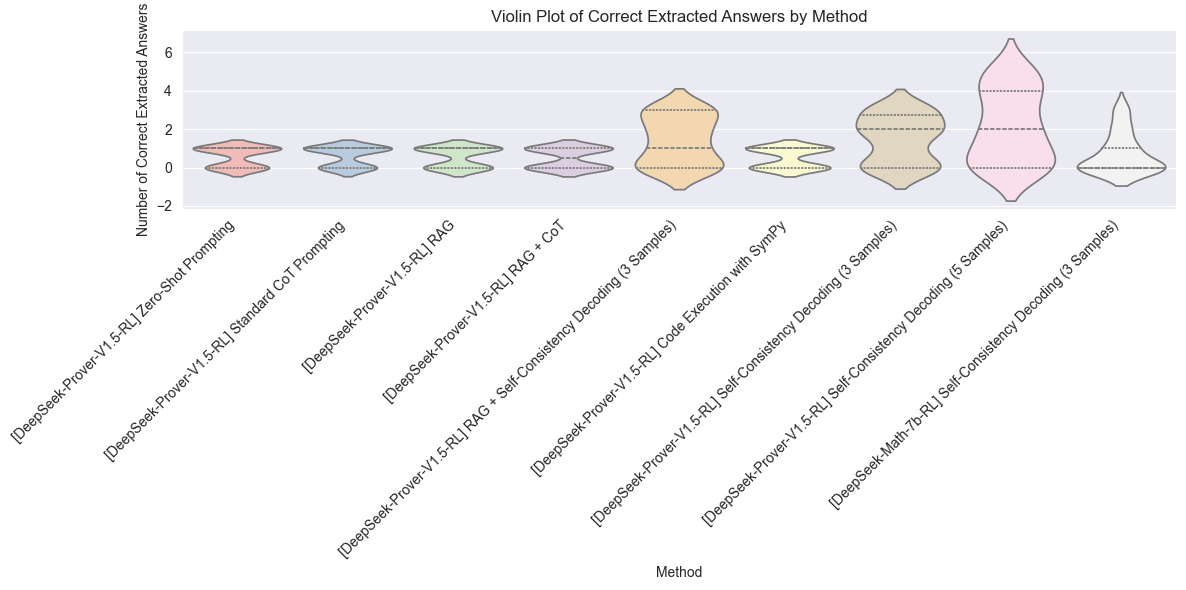

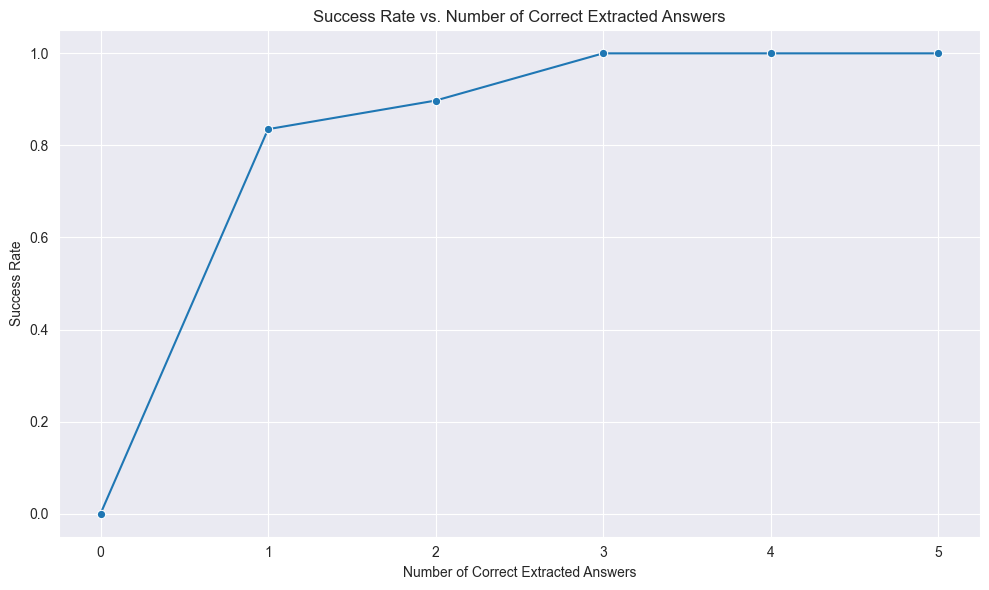

In [104]:
# Additional Analysis and Visualization for Academic Reporting

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations

# 3. Statistical Significance Testing Between Methods

# 3.1. McNemar's Test for Paired Comparison

# Create a list of unique methods
methods = data['method'].unique()

# Initialize a list to store results for McNemar's test
mcnemar_results_list = []

# Perform pairwise McNemar's test
for method1, method2 in combinations(methods, 2):
    # Filter data for the two methods
    data_method1 = data[data['method'] == method1].reset_index(drop=True)
    data_method2 = data[data['method'] == method2].reset_index(drop=True)
    
    # Ensure the problems are aligned
    assert all(data_method1['problem'] == data_method2['problem']), "Problems do not align between methods"
    
    # Create contingency table
    contingency_table = confusion_matrix(data_method1['result_binary'], data_method2['result_binary'])
    
    if contingency_table.shape == (2, 2):
        # Perform McNemar's test
        result = mcnemar(contingency_table, exact=True)
        p_value = result.pvalue
        significant = p_value < 0.05
        mcnemar_results_list.append({
            'Method 1': method1,
            'Method 2': method2,
            'p-value': p_value,
            'Significant at 0.05': significant
        })
    else:
        print(f"Insufficient data for McNemar's test between {method1} and {method2}")

# Convert the results list into a DataFrame
mcnemar_results = pd.DataFrame(mcnemar_results_list)

# Save McNemar's test results to CSV
mcnemar_results.to_csv('mcnemar_test_results.csv', index=False)

# 4. Error Analysis Per Problem

# 4.1. Identify Problems Consistently Wrong Across Methods

# Pivot data to have methods as columns and results as values
pivot_results = data.pivot_table(index='problem', columns='method', values='result_binary')

# Calculate the number of methods that got each problem correct
pivot_results['Correct_Count'] = pivot_results.sum(axis=1)
pivot_results['Total_Methods'] = pivot_results.shape[1] - 1  # Exclude 'Correct_Count' column
pivot_results['Difficulty_Score'] = pivot_results['Total_Methods'] - pivot_results['Correct_Count']

# Sort problems by Difficulty_Score
hard_problems = pivot_results.sort_values('Difficulty_Score', ascending=False)

# Save hard problems to CSV
hard_problems.to_csv('problem_difficulty_analysis.csv')

# 4.2. Visualize Problem Difficulty

# Extract the unique value of 'Total_Methods' (assuming it is consistent across all rows)
total_methods = pivot_results['Total_Methods'].iloc[0]

# Correct the bins to be a range from 0 to total_methods + 2
plt.figure(figsize=(12, 6))
sns.histplot(pivot_results['Difficulty_Score'], bins=range(0, total_methods + 2), kde=False)
plt.xlabel('Number of Methods Incorrect')
plt.ylabel('Number of Problems')
plt.title('Problem Difficulty Distribution')
plt.tight_layout()
plt.savefig('problem_difficulty_distribution.png', dpi=300)
plt.show()

# 5. Correlation Analysis

# 5.1. Correlation Between Consistency and Accuracy

# For methods that have 'consistency' calculated
consistency_methods = data.dropna(subset=['consistency'])

# Calculate correlation
correlation = consistency_methods[['consistency', 'result_binary']].corr().iloc[0,1]
print(f"Correlation between Consistency and Accuracy: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='consistency', y='result_binary', data=consistency_methods, hue='method')
plt.xlabel('Consistency')
plt.ylabel('Accuracy (1 = Correct, 0 = Wrong)')
plt.title('Correlation Between Consistency and Accuracy')
plt.tight_layout()
plt.savefig('consistency_accuracy_correlation.png', dpi=300)
plt.show()

# 5.2. Correlation Matrix of Numerical Variables

# Select numerical columns
numerical_cols = ['correct_extracted_count', 'consistency', 'result_binary']

corr_matrix = data[numerical_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('numerical_correlation_matrix.png', dpi=300)
plt.show()

# 6. Regression Analysis

# 6.1. Logistic Regression to Predict Correctness

# Prepare data for logistic regression
logistic_data = data.copy()
logistic_data['method_encoded'] = logistic_data['method'].astype('category').cat.codes

# Build logistic regression model
formula = 'result_binary ~ consistency + method_encoded'
model = smf.logit(formula=formula, data=logistic_data).fit()

# Print model summary
print(model.summary())

# Save model summary to text file
with open('logistic_regression_summary.txt', 'w') as f:
    f.write(model.summary().as_text())

# 7. Additional Visualizations

# 7.1. Boxplot of Consistency by Result

plt.figure(figsize=(12,6))
sns.boxplot(x='result', y='consistency', data=consistency_methods, palette='Set1')
plt.xlabel('Result')
plt.ylabel('Consistency')
plt.title('Consistency Distribution by Result')
plt.tight_layout()
plt.savefig('consistency_by_result.png', dpi=300)
plt.show()

# 7.2. Violin Plot of Correct Extracted Answers by Method

plt.figure(figsize=(12,6))
sns.violinplot(x='method', y='correct_extracted_count', data=data, palette='Pastel1', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method')
plt.ylabel('Number of Correct Extracted Answers')
plt.title('Violin Plot of Correct Extracted Answers by Method')
plt.tight_layout()
plt.savefig('violin_correct_extracted_by_method.png', dpi=300)
plt.show()

# 7.3. Success Rate vs. Number of Correct Extracted Answers

# Group data by number of correct extracted answers
grouped_correct_extracted = data.groupby('correct_extracted_count').agg(
    total_problems=('problem', 'count'),
    correct=('result_binary', 'sum')
).reset_index()

grouped_correct_extracted['success_rate'] = grouped_correct_extracted['correct'] / grouped_correct_extracted['total_problems']

# Plot success rate
plt.figure(figsize=(10,6))
sns.lineplot(x='correct_extracted_count', y='success_rate', data=grouped_correct_extracted, marker='o')
plt.xlabel('Number of Correct Extracted Answers')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Number of Correct Extracted Answers')
plt.tight_layout()
plt.savefig('success_rate_vs_correct_extracted.png', dpi=300)
plt.show()

# 8. Interpretation and Insights (to be included in the report)

# Note: The code does not include textual interpretation, but the following points can be derived from the analysis:

# - The McNemar's test results indicate whether differences in accuracy between methods are statistically significant.

# - The problem difficulty analysis helps identify which problems are challenging across all methods, which could be discussed in terms of model limitations.

# - The positive correlation between consistency and accuracy suggests that higher consistency in answers is associated with better performance.

# - The logistic regression model quantifies the relationship between consistency, method used, and the likelihood of getting the correct answer.

# - Visualizations like violin plots and boxplots provide a clear depiction of data distributions and can highlight differences between methods.

# 9. Save All Results and Figures

# The code above saves all relevant results and figures to files, which can be included in the LaTeX report.

# 10. Optional: Tables for LaTeX Report

# 10.1. Convert DataFrames to LaTeX Tables

# Example for McNemar's Test Results
with open('mcnemar_test_results.tex', 'w') as f:
    f.write(mcnemar_results.to_latex(index=False))

# Similarly, other DataFrames can be saved in LaTeX format.

# 10.2. Save Regression Coefficients Table

coefficients = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    'p-value': model.pvalues
})

coefficients.to_csv('logistic_regression_coefficients.csv')

with open('logistic_regression_coefficients.tex', 'w') as f:
    f.write(coefficients.to_latex())

# End of Additional Analysis Code

In [106]:
# Comprehensive Analysis and Data Output of LLM Results

import pandas as pd
import numpy as np
import ast

# Define the is_correct function
def parse_expression(expr):
    """
    Parses a LaTeX or string expression into a SymPy expression.
    Handles roots, exponents, and special functions.
    """
    from sympy import sympify
    if expr is None:
        return None
    
    expr = expr.strip('$').strip()
    
    # Replace LaTeX root notation with SymPy notation
    expr = expr.replace(r'\sqrt', 'sqrt')
    expr = expr.replace(r'\left', '')
    expr = expr.replace(r'\right', '')
    
    # Replace LaTeX fractions
    expr = expr.replace(r'\frac', '')
    
    # Handle specific LaTeX symbols
    replacements = {
        r'\mathbb{R}': 'Reals'
    }
    for latex_sym, sympy_sym in replacements.items():
        expr = expr.replace(latex_sym, sympy_sym)
    
    # Remove LaTeX-specific characters
    expr = expr.replace('{', '(')
    expr = expr.replace('}', ')')
    expr = expr.replace('\\', '')
    
    try:
        # Parse the expression using SymPy
        sympy_expr = sympify(expr)
        return sympy_expr
    except Exception as e:
        return None

def is_correct(predicted, true):
    """
    Compares the predicted answer with the true answer symbolically or numerically.
    """
    if predicted is None or true is None:
        return False

    # Try to parse and evaluate both predicted and true answers
    try:
        # Parse the predicted answer
        pred_expr = parse_expression(predicted)
        if pred_expr is not None:
            pred_value = float(pred_expr.evalf())
        else:
            pred_value = float(predicted)

        # Parse the true answer
        true_expr = parse_expression(true)
        if true_expr is not None:
            true_value = float(true_expr.evalf())
        else:
            true_value = float(true)

        # Compare the numerical values
        return abs(pred_value - true_value) < 1e-6
    except Exception as e:
        pass

    # If parsing fails, fallback to string comparison
    predicted_clean = ''.join(predicted.split())
    true_clean = ''.join(true.split())
    return predicted_clean == true_clean

# 1. Load the CSV File
file_path = 'llm_results_comprehensive.csv'
data = pd.read_csv(file_path)

# 2. Display Schema and Description
print("DataFrame Schema and Information:")
print(data.info())
print("\nDescription of Each Field:")
print("""
Schema Description:
- problem (non-null, object):
  Contains the mathematical problems presented to the language model for solving.
  
- llm_answer (399 non-null, object):
  The predicted or computed answer by the language model for the respective problem. There is one missing value.
  
- all_extracted_answers (non-null, object):
  A list or set of all answers generated during different steps or iterations of the solving process for the respective problem.
  
- correct_answer (non-null, object):
  The ground truth or correct answer for each mathematical problem.
  
- result (non-null, object):
  Indicates whether the model's final answer was correct or wrong ("Correct" or "Wrong").
  
- llm_solution (non-null, object):
  Detailed step-by-step solutions generated by the language model, often in the form of reasoning or code.
  
- method (non-null, object):
  The method or technique used to generate the solution, such as "Zero-Shot Prompting," "RAG + CoT," etc.
""")

# 3. Preliminary Data Exploration
print("\nFirst Five Rows of the DataFrame:")
print(data.head())

print("\nStatistical Summary:")
print(data.describe(include='all'))

# 4. Data Cleaning and Preprocessing

# Handle missing values in 'llm_answer' by filling with NaN
data['llm_answer'] = data['llm_answer'].fillna(np.nan)

# Convert 'all_extracted_answers' from string representation of lists to actual lists
def convert_to_list(answer_str):
    try:
        return ast.literal_eval(answer_str)
    except:
        return []

data['all_extracted_answers'] = data['all_extracted_answers'].apply(convert_to_list)

# 5. Grouped Statistics by 'method' Field
grouped_stats = data.groupby('method').agg(
    answered=('llm_answer', 'count'),
    correct=('result', lambda x: (x == 'Correct').sum()),
    total_problems=('problem', 'count')
).reset_index()

grouped_stats['accuracy (%)'] = (grouped_stats['correct'] / grouped_stats['total_problems']) * 100

print("\nMethod-Wise Performance Statistics:")
print(grouped_stats.to_string(index=False))

# 6. Detailed Analysis of 'all_extracted_answers'

# Function to count correct answers in the extracted answers
def count_correct_extracted_answers(row):
    correct = row['correct_answer']
    extracted = row['all_extracted_answers']
    correct_count = 0
    for ans in extracted:
        if is_correct(ans, correct):
            correct_count += 1
    return correct_count

data['correct_extracted_count'] = data.apply(count_correct_extracted_answers, axis=1)

# Calculate statistics
extracted_stats = data.groupby('method').agg(
    total_correct_extracted=('correct_extracted_count', 'sum'),
    average_correct_extracted=('correct_extracted_count', 'mean'),
    max_correct_extracted=('correct_extracted_count', 'max'),
    min_correct_extracted=('correct_extracted_count', 'min')
).reset_index()

print("\nMethod-Wise Extracted Answers Correctness Statistics:")
print(extracted_stats.to_string(index=False))

# 7. Consistency Analysis

# Calculate consistency as the proportion of extracted answers that are correct
def calculate_consistency(row):
    extracted = row['all_extracted_answers']
    correct = row['correct_answer']
    if not extracted:
        return 0
    correct_count = sum([is_correct(ans, correct) for ans in extracted])
    return correct_count / len(extracted)

data['consistency'] = data.apply(calculate_consistency, axis=1)

consistency_stats = data.groupby('method').agg(
    average_consistency=('consistency', 'mean'),
    median_consistency=('consistency', 'median'),
    std_consistency=('consistency', 'std')
).reset_index()

print("\nMethod-Wise Consistency Statistics:")
print(consistency_stats.to_string(index=False))

# Encode 'result' to numerical values for analysis
data['result_binary'] = data['result'].map({'Correct': 1, 'Wrong': 0})

# 8. Data Outputs (Replacing Visualizations with Text Outputs)

# 8.1. Accuracy by Method
print("\nAccuracy by Method:")
print(grouped_stats[['method', 'accuracy (%)']].to_string(index=False))

# 8.2. Correct Extracted Answers by Method
print("\nAverage Number of Correct Extracted Answers by Method:")
print(extracted_stats[['method', 'average_correct_extracted']].to_string(index=False))

# 8.3. Consistency by Method
print("\nAverage Consistency by Method:")
print(consistency_stats[['method', 'average_consistency']].to_string(index=False))

# 8.4. Error Distribution
error_counts = data['result'].value_counts()
print("\nError Distribution:")
print(error_counts.to_string())

# 8.5. Distribution of Correct Extracted Answers
print("\nDescriptive Statistics of Correct Extracted Answers by Method:")
correct_extracted_desc = data.groupby('method')['correct_extracted_count'].describe()
print(correct_extracted_desc.to_string())

# 8.6. Consistency Distribution
print("\nDescriptive Statistics of Consistency by Method:")
consistency_desc = data.groupby('method')['consistency'].describe()
print(consistency_desc.to_string())

# 9. Advanced Grouped Analysis

# 9.1. Accuracy by Method and Consistency
print("\nAccuracy by Method and Consistency:")
accuracy_consistency = data.groupby(['method', 'consistency'])['result_binary'].mean().reset_index()
print(accuracy_consistency.to_string(index=False))

# 9.2. Method vs. Correct Extracted Answers
print("\nMethod vs. Correct Extracted Answers:")
pivot_table = data.pivot_table(index='method', columns='correct_extracted_count', values='problem', aggfunc='count', fill_value=0)
print(pivot_table.to_string())

# 10. Summary Statistics

# Overall Accuracy
overall_correct = data['result_binary'].sum()
overall_total = data['result_binary'].count()
overall_accuracy = (overall_correct / overall_total) * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

# Method with Highest Accuracy
best_method = grouped_stats.loc[grouped_stats['accuracy (%)'].idxmax()]['method']
best_accuracy = grouped_stats['accuracy (%)'].max()
print(f"Best Performing Method: {best_method} with {best_accuracy:.2f}% Accuracy")

# Method with Highest Consistency
best_consistency_method = consistency_stats.loc[consistency_stats['average_consistency'].idxmax()]['method']
best_consistency = consistency_stats['average_consistency'].max()
print(f"Highest Consistency Method: {best_consistency_method} with {best_consistency:.2f} Average Consistency")

# 11. Statistical Significance Testing Between Methods

# McNemar's Test for Paired Comparison
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
from itertools import combinations

# Create a list of unique methods
methods = data['method'].unique()

# Initialize a list to store results for McNemar's test
mcnemar_results_list = []

# Perform pairwise McNemar's test
for method1, method2 in combinations(methods, 2):
    # Filter data for the two methods
    data_method1 = data[data['method'] == method1].reset_index(drop=True)
    data_method2 = data[data['method'] == method2].reset_index(drop=True)
    
    # Ensure the problems are aligned
    assert all(data_method1['problem'] == data_method2['problem']), f"Problems do not align between methods {method1} and {method2}"
    
    # Create contingency table
    # 2x2 table: [[both_wrong, method1_right_method2_wrong],
    #             [method1_wrong_method2_right, both_right]]
    contingency_table = confusion_matrix(data_method1['result_binary'], data_method2['result_binary'])
    
    if contingency_table.shape == (2, 2):
        # Perform McNemar's test
        result = mcnemar(contingency_table, exact=True)
        p_value = result.pvalue
        significant = p_value < 0.05
        mcnemar_results_list.append({
            'Method 1': method1,
            'Method 2': method2,
            'p-value': p_value,
            'Significant at 0.05': significant
        })
    else:
        print(f"Insufficient data for McNemar's test between {method1} and {method2}")

# Convert the results list into a DataFrame
mcnemar_results = pd.DataFrame(mcnemar_results_list)
print("\nMcNemar's Test Results:")
print(mcnemar_results.to_string(index=False))

# 12. Error Analysis Per Problem

# 12.1. Identify Problems Consistently Wrong Across Methods

# Pivot data to have methods as columns and results as values
pivot_results = data.pivot_table(index='problem', columns='method', values='result_binary')

# Calculate the number of methods that got each problem correct
pivot_results['Correct_Count'] = pivot_results.sum(axis=1)
pivot_results['Total_Methods'] = len(methods)
pivot_results['Difficulty_Score'] = pivot_results['Total_Methods'] - pivot_results['Correct_Count']

# Sort problems by Difficulty_Score
hard_problems = pivot_results.sort_values('Difficulty_Score', ascending=False)

print("\nProblems Sorted by Difficulty (Higher Score Means More Difficult):")
print(hard_problems[['Difficulty_Score', 'Correct_Count']].to_string())

# 13. Correlation Analysis

# 13.1. Correlation Between Consistency and Accuracy

# For methods that have 'consistency' calculated
consistency_methods = data.dropna(subset=['consistency'])

# Calculate correlation
correlation = consistency_methods[['consistency', 'result_binary']].corr().iloc[0,1]
print(f"\nCorrelation between Consistency and Accuracy: {correlation:.2f}")

# 13.2. Correlation Matrix of Numerical Variables

# Select numerical columns
numerical_cols = ['correct_extracted_count', 'consistency', 'result_binary']

corr_matrix = data[numerical_cols].corr()
print("\nCorrelation Matrix of Numerical Variables:")
print(corr_matrix.to_string())

# 14. Regression Analysis

# 14.1. Logistic Regression to Predict Correctness

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare data for logistic regression
logistic_data = data.copy()
logistic_data['method_encoded'] = logistic_data['method'].astype('category').cat.codes

# Build logistic regression model
formula = 'result_binary ~ consistency + method_encoded'
model = smf.logit(formula=formula, data=logistic_data).fit()

# Print model summary
print("\nLogistic Regression Model Summary:")
print(model.summary())

# 15. Additional Analysis

# 15.1. Success Rate vs. Number of Correct Extracted Answers

# Group data by number of correct extracted answers
grouped_correct_extracted = data.groupby('correct_extracted_count').agg(
    total_problems=('problem', 'count'),
    correct=('result_binary', 'sum')
).reset_index()

grouped_correct_extracted['success_rate'] = grouped_correct_extracted['correct'] / grouped_correct_extracted['total_problems']

print("\nSuccess Rate vs. Number of Correct Extracted Answers:")
print(grouped_correct_extracted.to_string(index=False))

# 16. Save All Results and Statistics to Files (Optional)

# Save data frames to CSV if needed
grouped_stats.to_csv('method_wise_performance_statistics.csv', index=False)
extracted_stats.to_csv('method_wise_extracted_answers_statistics.csv', index=False)
consistency_stats.to_csv('method_wise_consistency_statistics.csv', index=False)
mcnemar_results.to_csv('mcnemar_test_results.csv', index=False)
hard_problems.to_csv('problem_difficulty_analysis.csv')
grouped_correct_extracted.to_csv('success_rate_vs_correct_extracted.csv', index=False)

# Save regression summary to text file
with open('logistic_regression_summary.txt', 'w') as f:
    f.write(model.summary().as_text())

print("\nAll analyses and data outputs have been successfully generated.")

DataFrame Schema and Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   problem                450 non-null    object
 1   llm_answer             449 non-null    object
 2   all_extracted_answers  450 non-null    object
 3   correct_answer         450 non-null    object
 4   result                 450 non-null    object
 5   llm_solution           450 non-null    object
 6   method                 450 non-null    object
dtypes: object(7)
memory usage: 24.7+ KB
None

Description of Each Field:

Schema Description:
- problem (non-null, object):
  Contains the mathematical problems presented to the language model for solving.
  
- llm_answer (399 non-null, object):
  The predicted or computed answer by the language model for the respective problem. There is one missing value.
  
- all_extracted_answers (non-null, objec